# Path Planning: Graph Search

<img src="./graph_visualization.png" width="25%">

## Problem
A robot needs to travel from **A** to **F**.  
All edges have the same cost (each hop = 1).  
We want the **shortest path (minimum hops)**.

---

## 2) BFS — Breadth-First Search
- **Idea:** Explore **level by level** (all neighbors first, then their neighbors, …).
- **Data Strcucutre:** Use FIFO, queue structure.
- **Guarantee:** In an **unweighted** graph, the first time you reach the goal you’ve found an **optimal (shortest-hop) path**.
- **Complexity:**  
  - **Time:** O(V + E) — visits each vertex and edge once.  
  - **Space:** O(V) in worst case due to recursion stack or explicit stack.

- **Pros:** Guaranteed to find the shortest path.
- **Cons:** Can explore unnecessary nodes if the graph is wide.

In [1]:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

start = 'A'
goal = 'F'

queue = [start]
visited = set(start)
parent = {}

while queue:
    current = queue.pop(0)
    print(f"Visiting: {current}")
    for neighbor in graph[current]:

        # This guarantees that the first time we visit a node is the shortest path from the start.
        # For instance: When we reach F for the first time (from C), you do:
        # parent[F] = C
        # visited.add(F)

        # Later, when we get to E and look at its neighbor F, the condition
        # if neighbor not in visited: 
        # fails (because F is already visited), so BFS does not overwrite the existing

        if neighbor not in visited: 
            queue.append(neighbor)
            visited.add(neighbor)
            parent[neighbor] = current

    print(f"Neighbors: {queue}")
    print(f"Parent Mapping: {parent}")
    print(f"Visited: {visited}")


key = goal
path = []

while key in parent.keys():

    # Assume this is our current parent mapping dictionary:
    # parent = {'B': 'A', 'C': 'A', 'F': 'C'}
    # parent.keys() returns dict_keys(['B', 'C', 'F'])

    # .insert(index, value) inserts a value into a list at the given index.
    # index = 0 means insert at the very front of the list.

    key = parent[key]
    path.insert(0, key)

path.append(goal)
print("\n")
print("Path found:", path)

Visiting: A
Neighbors: ['B', 'C']
Parent Mapping: {'B': 'A', 'C': 'A'}
Visited: {'A', 'C', 'B'}
Visiting: B
Neighbors: ['C', 'D', 'E']
Parent Mapping: {'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B'}
Visited: {'A', 'E', 'B', 'C', 'D'}
Visiting: C
Neighbors: ['D', 'E', 'F']
Parent Mapping: {'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'C'}
Visited: {'A', 'E', 'B', 'F', 'C', 'D'}
Visiting: D
Neighbors: ['E', 'F']
Parent Mapping: {'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'C'}
Visited: {'A', 'E', 'B', 'F', 'C', 'D'}
Visiting: E
Neighbors: ['F']
Parent Mapping: {'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'C'}
Visited: {'A', 'E', 'B', 'F', 'C', 'D'}
Visiting: F
Neighbors: []
Parent Mapping: {'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'C'}
Visited: {'A', 'E', 'B', 'F', 'C', 'D'}


Path found: ['A', 'C', 'F']


#### Iteration Steps

1. First check  
   - Is `"F"` in `parent.keys()`? → **Yes**, run loop.  
   - `key = parent['F']` → `key = 'C'`  
   - Insert `'C'` at the front of `path`

2. Second check  
   - Is `"C"` in `parent.keys()`? → **Yes**, run loop.  
   - `key = parent['C']` → `key = 'A'`  
   - Insert `'A'` at the front of `path`

3. Third check  
   - Is `"A"` in `parent.keys()`? → **No**, stop loop.


---

## 2) DFS — Depth-First Search
- **Idea:** Go **as deep as possible** along one path before backtracking. 
- **Data Strcucutre:** Use LIFO, stack structure.
- **Guarantee:** No shortest-path guarantee in unweighted graphs.
- **Complexity:**  
  - **Time:** O(V + E) — visits each vertex and edge once.  
  - **Space:** O(V) in worst case due to recursion stack or explicit stack.

- **Pros:** Can sometimes find a goal faster if that goal happens to be located deep along the first path DFS explores.
- **Cons:** Can wander down long dead ends; path found may be far from optimal.

In [2]:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

start = 'A'
goal = 'F'

queue = [start]
visited = set(start)
parent = {}

while queue:
    current = queue.pop()
    print(f"Visiting: {current}")
    for neighbor in graph[current]:

        # This guarantees that the first time we visit a node is the shortest path from the start.
        # For instance: When we reach F for the first time (from C), you do:
        # parent[F] = C
        # visited.add(F)

        # Later, when we get to E and look at its neighbor F, the condition
        # if neighbor not in visited: 
        # fails (because F is already visited), so BFS does not overwrite the existing

        if neighbor not in visited: 
            queue.append(neighbor)
            visited.add(neighbor)
            parent[neighbor] = current

    print(f"Neighbors: {queue}")
    print(f"Parent Mapping: {parent}")
    print(f"Visited: {visited}")


key = goal
path = []

while key in parent.keys():

    # Assume this is our current parent mapping dictionary:
    # parent = {'B': 'A', 'C': 'A', 'F': 'C'}
    # parent.keys() returns dict_keys(['B', 'C', 'F'])

    # .insert(index, value) inserts a value into a list at the given index.
    # index = 0 means insert at the very front of the list.

    key = parent[key]
    path.insert(0, key)

path.append(goal)
print("\n")
print("Path found:", path)

Visiting: A
Neighbors: ['B', 'C']
Parent Mapping: {'B': 'A', 'C': 'A'}
Visited: {'A', 'C', 'B'}
Visiting: C
Neighbors: ['B', 'F']
Parent Mapping: {'B': 'A', 'C': 'A', 'F': 'C'}
Visited: {'A', 'C', 'F', 'B'}
Visiting: F
Neighbors: ['B', 'E']
Parent Mapping: {'B': 'A', 'C': 'A', 'F': 'C', 'E': 'F'}
Visited: {'A', 'E', 'B', 'F', 'C'}
Visiting: E
Neighbors: ['B']
Parent Mapping: {'B': 'A', 'C': 'A', 'F': 'C', 'E': 'F'}
Visited: {'A', 'E', 'B', 'F', 'C'}
Visiting: B
Neighbors: ['D']
Parent Mapping: {'B': 'A', 'C': 'A', 'F': 'C', 'E': 'F', 'D': 'B'}
Visited: {'A', 'E', 'B', 'F', 'C', 'D'}
Visiting: D
Neighbors: []
Parent Mapping: {'B': 'A', 'C': 'A', 'F': 'C', 'E': 'F', 'D': 'B'}
Visited: {'A', 'E', 'B', 'F', 'C', 'D'}


Path found: ['A', 'C', 'F']


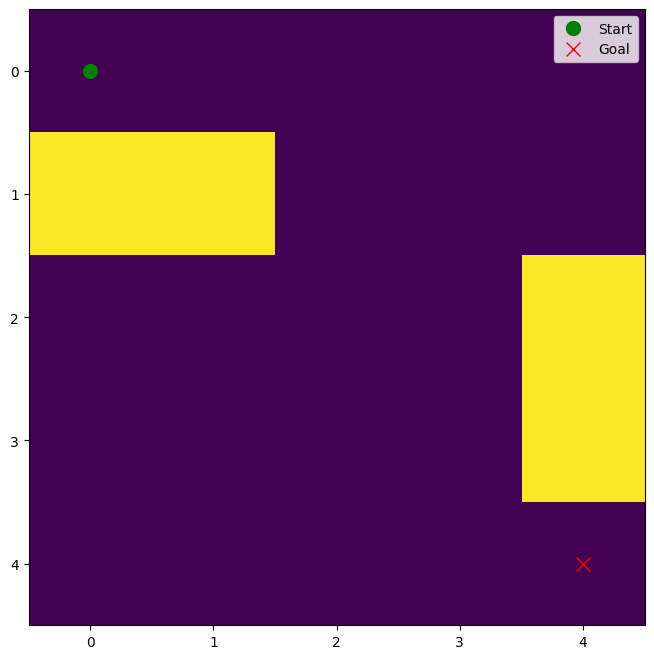

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# L-shaped obstacle grid (0 = free, 1 = obstacle)
grid_map1 = np.array([
 [0,0,0,0,0],
 [1,1,0,0,0],
 [0,0,0,0,1],
 [0,0,0,0,1],
 [0,0,0,0,0]
])

# In real world, the obstacle probability map would be obtained from sensor data
probability_map1 = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0],
    [0.8, 0.2, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.3],
    [0.0, 0.0, 0.0, 0.0, 0.4],
    [0.0, 0.0, 0.0, 0.0, 0.0]
])

# Max probability allowed for free space
THRESHOLD = 0.3  

# Define the robot movement and check where it can move
def get_neighbor(current):
    neighbors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        neighbor = (current[0] + dx, current[1] + dy)
        if 0 <= neighbor[0] < grid_map1.shape[0] and 0 <= neighbor[1] < grid_map1.shape[1]:
            if grid_map1[neighbor] <= THRESHOLD:  # Check if the cell is free
                neighbors.append(neighbor)

    return neighbors

# Start and goal points
start = (0, 0)  # top-left
goal = (4, 4)  # bottom-right

# Display
plt.figure(figsize=(8, 8))
plt.imshow(grid_map1, cmap='viridis')

plt.plot(start[1], start[0], 'go', markersize=10, label="Start")
plt.plot(goal[1], goal[0], 'rx', markersize=10, label="Goal")

plt.legend()
plt.show()

Path: [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4)]


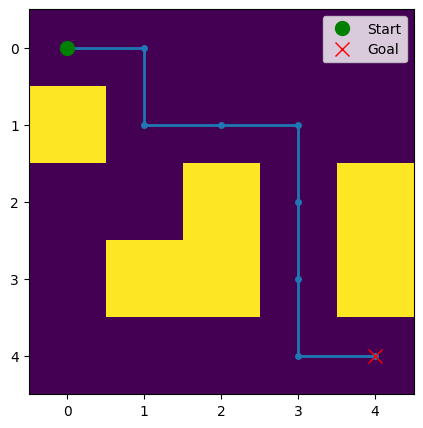

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

# 0 = free, 1 = obstacle
grid_map1 = np.array([
    [0,0,0,0,0],
    [1,0,0,0,0],
    [0,0,1,0,1],
    [0,1,1,0,1],
    [0,0,0,0,0]
])

def get_neighbors(current):
    r, c = current
    neighbors = []
    for dr, dc in [(-1,0), (1,0), (0,-1), (0,1)]:
        nr, nc = r + dr, c + dc
        if 0 <= nr < grid_map1.shape[0] and 0 <= nc < grid_map1.shape[1]:
            if grid_map1[nr, nc] == 0:  # walkable
                neighbors.append((nr, nc))
    return neighbors


def bfs(start, goal):

    queue = [start]
    visited = {start}
    parent = {}

    while queue:

        current = queue.pop(0)

        for neighbor in get_neighbors(current):
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                queue.append(neighbor)

   

    # Reconstruct path from goal to start
    path = [goal]
    while path[-1] != start:
        path.append(parent[path[-1]])
        
    path.reverse()
    return path


# Example
start = (0, 0)
goal = (4, 4)
path = bfs(start, goal)
print("Path:", path)

# Plot
plt.figure(figsize=(5,5))
plt.imshow(grid_map1, cmap='viridis')  # black=obstacle, white=free
if path:
    rr, cc = zip(*path)
    plt.plot(cc, rr, '-o', linewidth=2, markersize=4)
plt.plot(start[1], start[0], 'go', markersize=10, label="Start")
plt.plot(goal[1], goal[0], 'rx', markersize=10, label="Goal")
plt.legend()
plt.show()


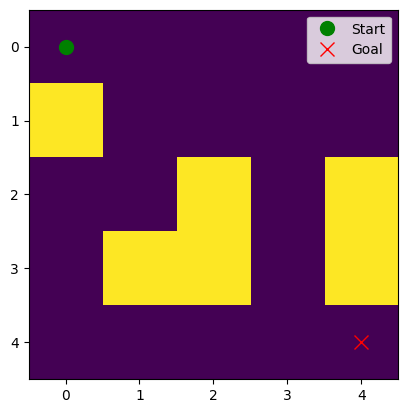

Path: [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4)]


In [ ]:
import matplotlib.pyplot as plt
import numpy as nps

# 0 = free, 1 = obstacle
grid_map1 = np.array([
    [0,0,0,0,0],
    [1,0,0,0,0],
    [0,0,1,0,1],
    [0,1,1,0,1],
    [0,0,0,0,0]
])

def get_neighbors(current):
    r, c = current
    neighbors = []
    for dr, dc in [(-1,0), (1,0), (0,-1), (0,1)]:
        nr, nc = r + dr, c + dc
        if 0 <= nr < grid_map1.shape[0] and 0 <= nc < grid_map1.shape[1]:
            if grid_map1[nr, nc] == 0:  # walkable
                neighbors.append((nr, nc))
    return neighbors


def bfs(start, goal):
    queue = [start]
    visited = {start}
    parent = {}

    # --- Keep one figure/axis for the whole animation ---
    plt.ion()
    fig, ax = plt.subplots()
    ax.imshow(grid_map1, cmap='viridis')
    ax.plot(start[1], start[0], 'go', markersize=10, label="Start")
    ax.plot(goal[1], goal[0], 'rx', markersize=10, label="Goal")
    ax.legend()
    plt.show(block=False)
    # ----------------------------------------------------

    while queue:
        current = queue.pop(0)

        # Mark current as visited
        ax.plot(current[1], current[0], 'g.', markersize=6)
        fig.canvas.draw()
        fig.canvas.flush_events()
        plt.pause(0.0001)

        for neighbor in get_neighbors(current):
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                queue.append(neighbor)

                # Mark neighbor as discovered (red dot)
                ax.plot(neighbor[1], neighbor[0], 'r.', markersize=4)
                fig.canvas.draw()
                fig.canvas.flush_events()
                plt.pause(0.0001)

    # Reconstruct and draw path
    path = [goal]
    while path[-1] != start:
        path.append(parent[path[-1]])
    path.reverse()

    rr, cc = zip(*path)
    ax.plot(cc, rr, '-y', linewidth=2)

    plt.ioff()
    plt.show()
    return path


# Example
start = (0, 0)
goal = (4, 4)
path = bfs(start, goal)
print("Path:", path)

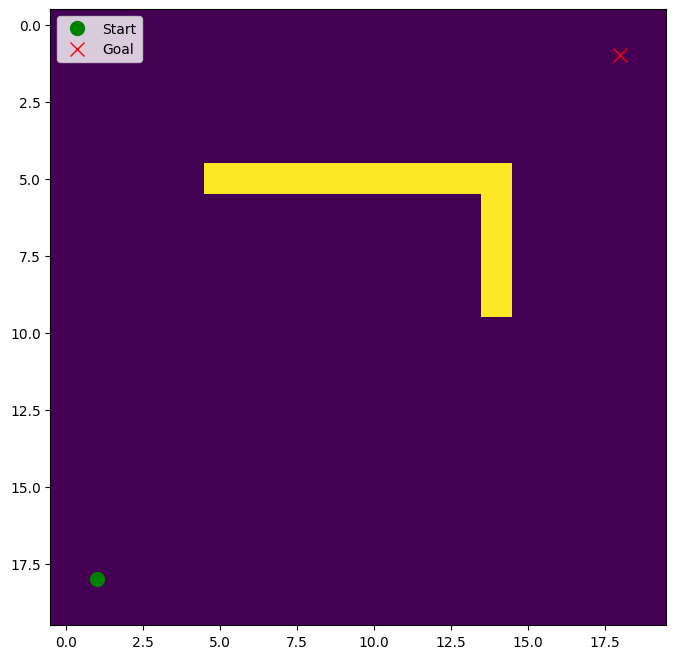

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# L-shaped obstacle grid (0 = free, 1 = obstacle)
grid_map2 = np.array([
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
])

# Start and goal points
start = (18, 1)   # bottom-right
goal = (1, 18)  # top-left (since it's a 20x20 grid)

# Display
plt.figure(figsize=(8, 8))
plt.imshow(grid_map2, cmap='viridis')

plt.plot(start[1], start[0], 'go', markersize=10, label="Start")
plt.plot(goal[1], goal[0], 'rx', markersize=10, label="Goal")

plt.legend()
plt.show()


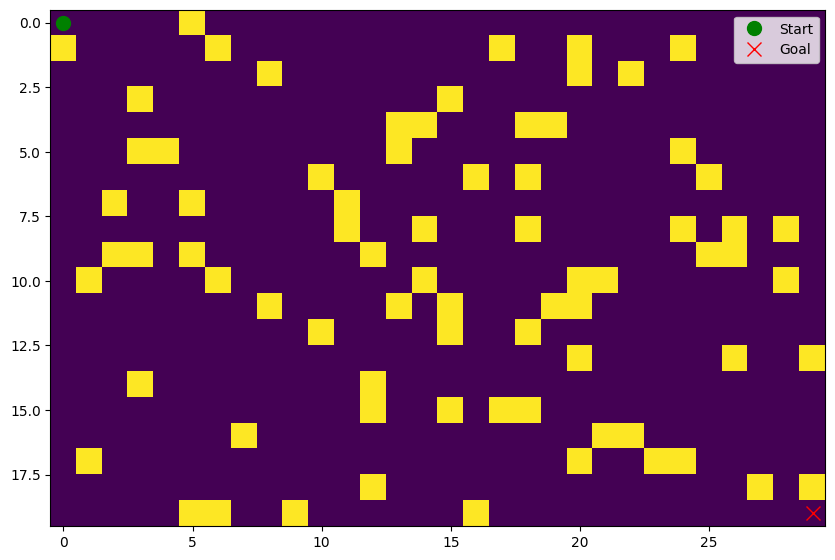

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Use the grid map from BFS example (0 = free, 1 = obstacle)
grid_map = np.array([
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0],
[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0],
[0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0],
[0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0],
[0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0],
[0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0],
[0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1],
[0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1],
[0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
])

# Start and goal points
start = (0, 0)   # top-left
goal = (19, 29)  # bottom-right

# Display
plt.figure(figsize=(10, 7))
plt.imshow(grid_map, cmap='viridis')

plt.plot(start[1], start[0], 'go', markersize=10, label="Start")
plt.plot(goal[1], goal[0], 'rx', markersize=10, label="Goal")

plt.legend()
plt.show()


### Time Complexity Explaination — O(V + E)
Means: The time it takes to finish depends on:
- **V** = number of vertices (places)
- **E** = number of edges (roads)

**Why?**
- We must look at every vertex once (**V**)
- And check every edge once (**E**)


### Space Complexity — O(V)
This is how much memory we use while running.

O(V) means: In the worst case, we might need to keep every vertex in memory at once — for example, storing them in:
- The `visited` set
- The queue (**BFS**) or stack/recursion (**DFS**)